In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time as time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
red_df = pd.read_csv('winequality-red.csv')
white_df = pd.read_csv('winequality-white.csv')
red_df
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_df.shape

(1599, 12)

In [5]:
good_wine = red_df.loc[(red_df['quality'] > 6)]
good_wine_shape = good_wine.shape[0]
print(good_wine_shape)

217


In [6]:
bad_wine = red_df.loc[(red_df['quality'] < 5)]
bad_wine_shape = bad_wine.shape[0]
print(bad_wine_shape)

63


In [7]:
mediocre_wine = red_df[(red_df['quality'] >= 5) & (red_df['quality'] <= 6)]
mediocre_wine_shape = mediocre_wine.shape[0]
print(mediocre_wine_shape)

1319


In [8]:
min_score = np.min(red_df['quality'])
max_score = np.max(red_df['quality'])
print(min_score)
print(max_score)

3
8


In [9]:
white_df.shape

(4898, 12)

In [10]:
good_wine = white_df.loc[(white_df['quality'] > 6)]
good_wine_shape = good_wine.shape[0]
print(good_wine_shape)

1060


In [11]:
bad_wine = white_df.loc[(white_df['quality'] < 5)]
bad_wine_shape = bad_wine.shape[0]
print(bad_wine_shape)

183


In [12]:
mediocre_wine = white_df[(white_df['quality'] >= 5) & (white_df['quality'] <= 6)]
mediocre_wine_shape = mediocre_wine.shape[0]
print(mediocre_wine_shape)

3655


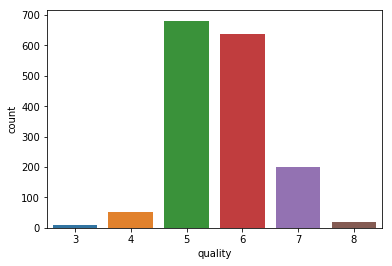

In [8]:
sns.countplot(x='quality',data=red_df)

In [9]:
display(np.round(red_df.describe()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


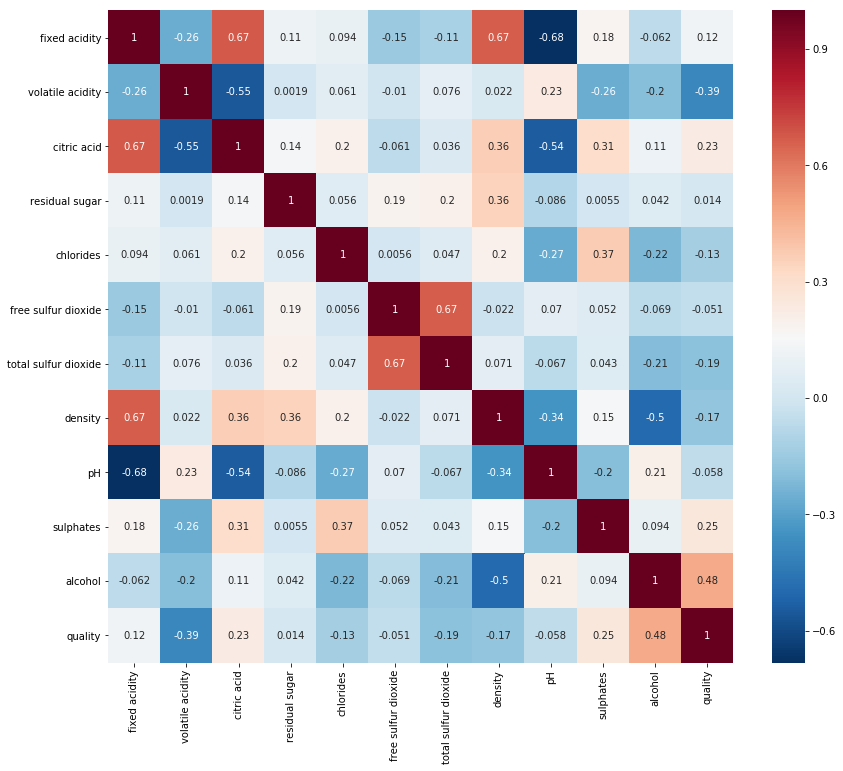

In [10]:
corr = red_df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(corr, annot=True, cmap='RdBu_r')
fig1 = heatmap.get_figure()
fig1.savefig("correlation.png")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


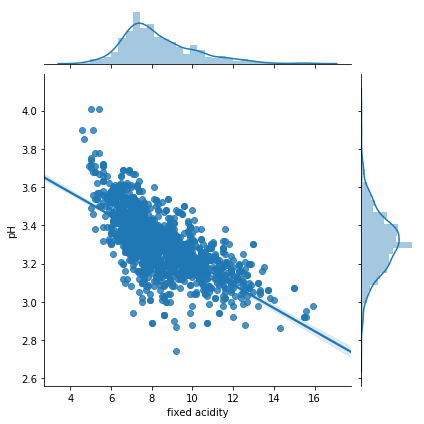

In [11]:
x = red_df["fixed acidity"]
y = red_df["pH"]
sns.jointplot(x, y, kind='reg')

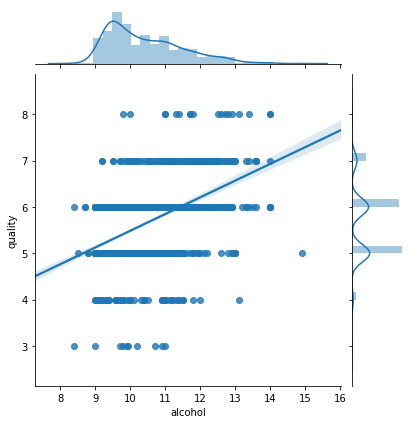

In [12]:
x = red_df["alcohol"]
y = red_df["quality"]
sns.jointplot(x, y, kind='reg')

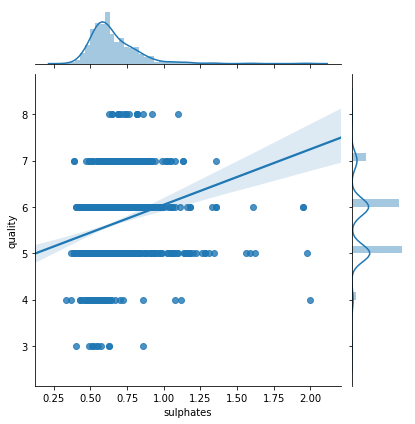

In [13]:
x = red_df["sulphates"]
y = red_df["quality"]
sns.jointplot(x, y, kind='reg')

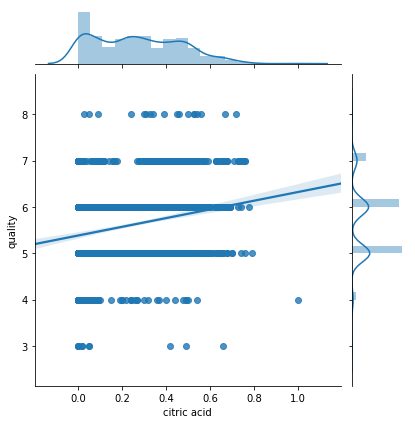

In [14]:
x = red_df["citric acid"]
y = red_df["quality"]
sns.jointplot(x, y, kind='reg')

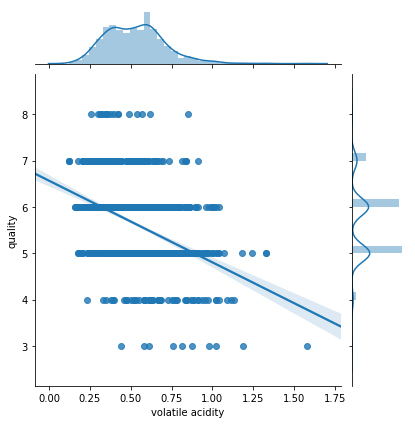

In [15]:
x = red_df["volatile acidity"]
y = red_df["quality"]
sns.jointplot(x, y, kind='reg')

# Plotting scatter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd61eb8>,
      dtype=object)

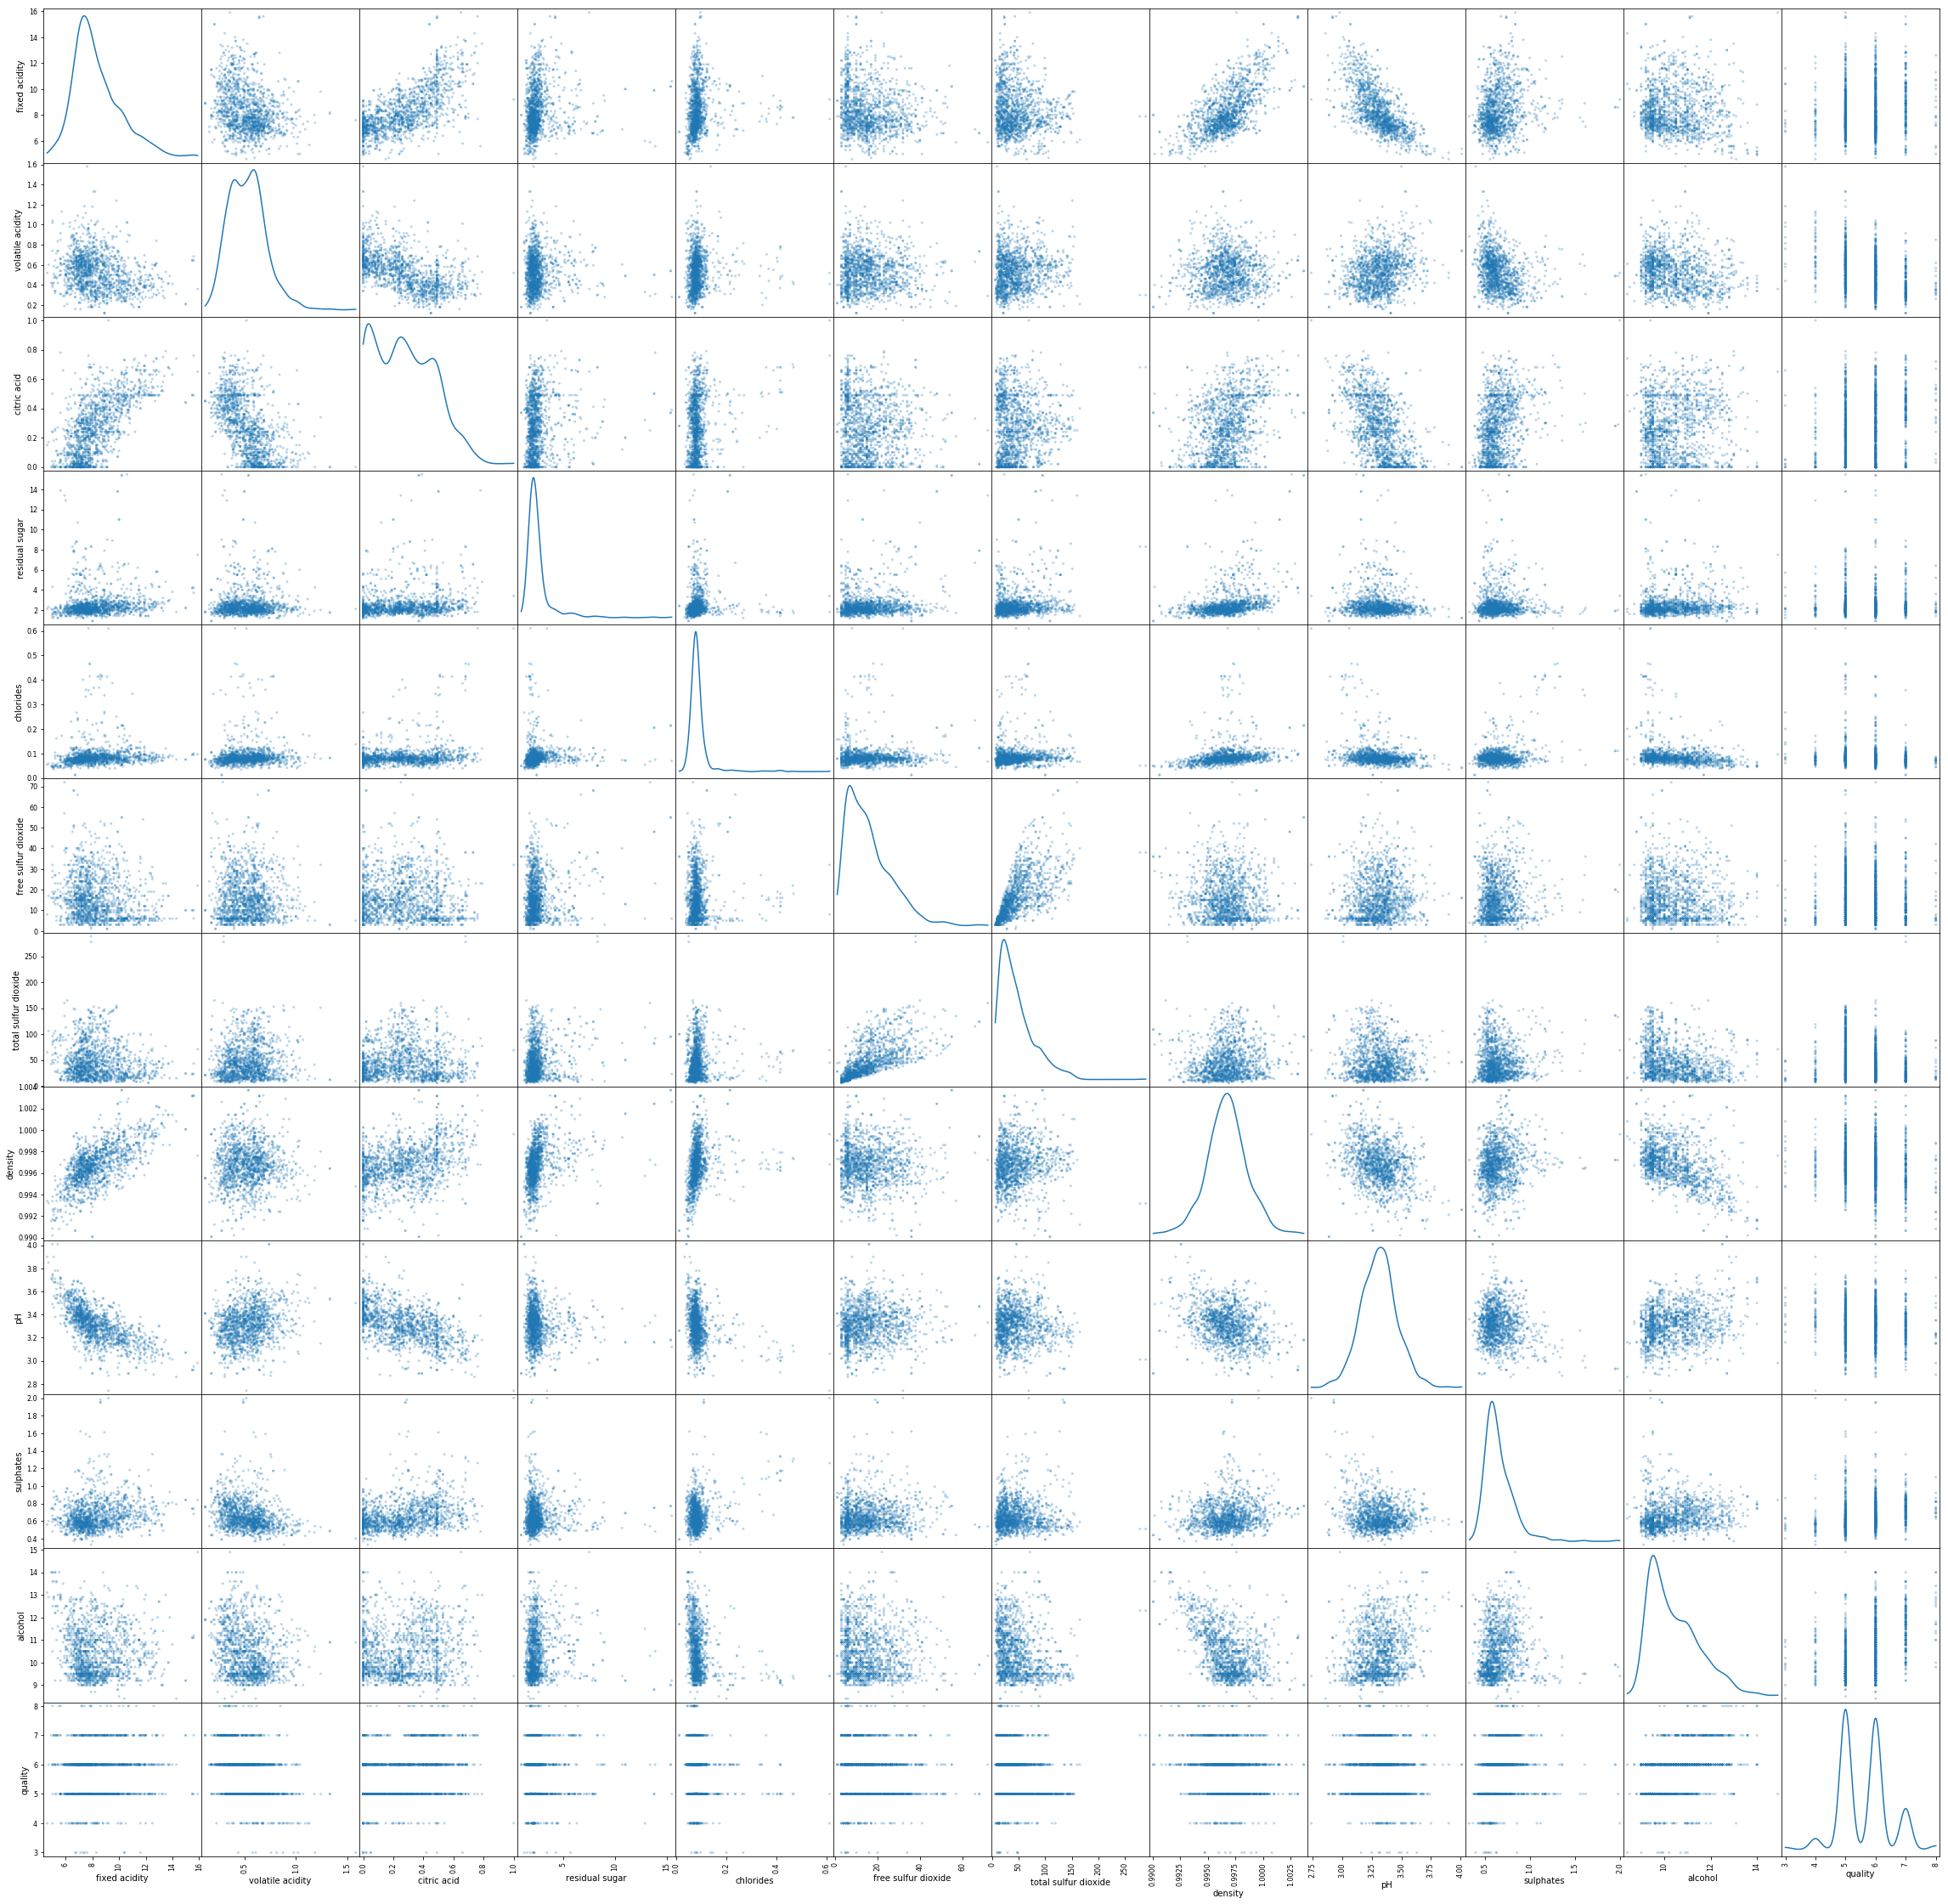

In [16]:
pd.plotting.scatter_matrix(red_df, alpha=0.3, figsize=(40,40), diagonal='kde')

# Random Forest Classifier

## Red Wine

In [17]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
y = red_df[target]
X = red_df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(X_train_scaled)

[[-0.90444255  0.64731939 -0.19902877 ...  0.31440218  0.18881465
   0.56025826]
 [-1.07550016 -1.04377649  1.41924257 ...  0.38051576  1.54698432
   1.98094493]
 [-0.67636573 -0.43981367 -0.68451018 ...  0.31440218 -1.05125331
   0.37083337]
 ...
 [-0.50530812  2.61019854 -1.43970347 ...  1.76890086  0.01166208
  -0.10272886]
 [-0.2202121   1.40227291 -1.43970347 ...  0.11606145  0.07071294
   0.56025826]
 [-0.50530812  0.46613055 -1.38576109 ...  1.1077651  -0.10643963
  -0.48157864]]


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all conve

In [20]:
rfc = RandomForestClassifier(n_estimators=50, random_state=100, max_depth=50, min_samples_leaf=5)
rfc.fit(X_train, y_train)
feature_imp = pd.Series(rfc.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        41
           5       0.68      0.72      0.70       546
           6       0.54      0.66      0.60       512
           7       0.57      0.26      0.36       159
           8       0.00      0.00      0.00        14

   micro avg       0.61      0.61      0.61      1280
   macro avg       0.30      0.27      0.28      1280
weighted avg       0.58      0.61      0.58      1280



/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


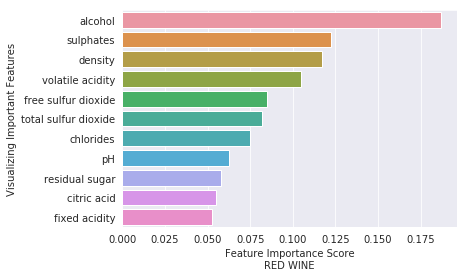

In [21]:
sns.set_style("darkgrid")
rfc_graph_red = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score\nRED WINE")
plt.ylabel("Visualizing Important Features")
plt.show()
fig2 = rfc_graph_red.get_figure()
fig2.savefig("rfc_redwine.png")

In [22]:
from sklearn.metrics import classification_report,accuracy_score
accu_score_rfc_red = accuracy_score(y_test, pred_rfc)
accu_score_rfc_red

0.60546875

# White Wine

In [23]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
y = white_df[target]
X = white_df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(X_train_scaled)

[[ 1.34829588  0.42517304  0.21405911 ...  0.66213108 -0.17221213
   1.21613539]
 [-1.00423483  1.12265738 -1.71499297 ... -0.85053301  0.26071774
   0.07702908]
 [ 0.28965706 -0.07303006 -0.20530004 ... -0.784765    0.60706164
  -1.46890091]
 ...
 [-0.29847562 -0.07303006  1.55600839 ... -0.06131696 -0.08562615
  -0.81798302]
 [ 3.34794699 -0.37195193  0.96890558 ... -2.95510913 -0.17221213
   0.23975855]
 [-1.70999405  2.21870421 -1.71499297 ...  1.91172316  3.37781282
   2.43660644]]


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [25]:
rfc = RandomForestClassifier(n_estimators=50, random_state=100, max_depth=50, min_samples_leaf=5)
rfc.fit(X_train, y_train)
feature_imp = pd.Series(rfc.feature_importances_, index=list(X.columns)).sort_values(ascending=False)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


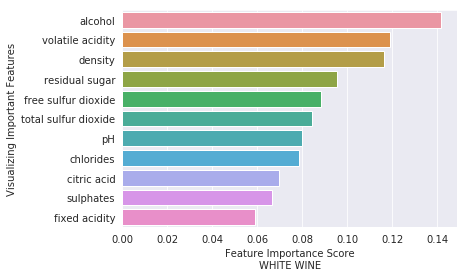

In [26]:
sns.set_style("darkgrid")
rfc_graph_white = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score\nWHITE WINE")
plt.ylabel("Visualizing Important Features")
plt.show()
fig3 = rfc_graph_white.get_figure()
fig3.savefig("rfc_whitewine.png")

In [27]:
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        52
           5       0.67      0.64      0.66       451
           6       0.59      0.80      0.68       638
           7       0.68      0.44      0.53       280
           8       1.00      0.02      0.04        44
           9       0.00      0.00      0.00         1

   micro avg       0.63      0.63      0.63      1470
   macro avg       0.42      0.27      0.27      1470
weighted avg       0.62      0.63      0.60      1470



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
from sklearn.metrics import classification_report,accuracy_score
accu_score_rfc_white = accuracy_score(y_test, pred_rfc)
accu_score_rfc_white

0.6265306122448979

In [29]:
fake_wine_data = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 14.5],
                 [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9],
                 [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 7]]

for i, quality in enumerate(rfc.predict(fake_wine_data)):
    print(f"Predicted quality for {i+1} is: {quality}")

Predicted quality for 1 is: 6
Predicted quality for 2 is: 6
Predicted quality for 3 is: 6


# Decision Tree
Decision tree to try to determine the characteristics of 'good' wine in our classification

In [30]:
from sklearn import tree
import graphviz
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
y = red_df[target]
X = red_df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
clfTree = tree.DecisionTreeClassifier(max_depth=2)
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

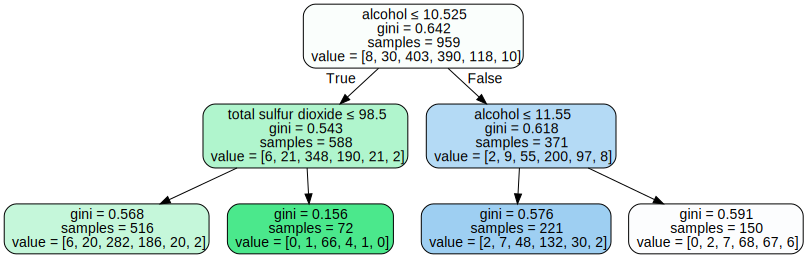

In [32]:
from IPython.display import Image 
dot_data_red = tree.export_graphviz(clfTree, out_file=None, max_depth=None, feature_names=features, filled=True, rounded=True, special_characters=True)
valgTree_red = graphviz.Source(dot_data_red)
#fig3 = valgTree_red.get_figure()
# valgTree_red.savefig("dt_red.png")
valgTree_red

In [33]:
valgTree_red.render("dt_red")

'dt_red.pdf'

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower gini index should be preferred.

## Testing Data - Red Wine

In [34]:
#clfTree = tree.DecisionTreeClassifier(max_depth=2)
y_pred = clfTree.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        23
           5       0.57      0.82      0.67       278
           6       0.45      0.44      0.45       248
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00         8

   micro avg       0.53      0.53      0.53       640
   macro avg       0.17      0.21      0.19       640
weighted avg       0.42      0.53      0.47       640



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
accu_score_dt_red = accuracy_score(y_test, y_pred)
accu_score_dt_red

0.5265625

In [38]:
print(accuracy_score(y_test, y_pred))

0.5265625


In [39]:
fake_wine_data = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 14.5],
                 [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9],
                 [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 7]]

for i, quality in enumerate(clfTree.predict(fake_wine_data)):
    print(f"Predicted quality for {i+1} is: {quality}")

Predicted quality for 1 is: 6
Predicted quality for 2 is: 5
Predicted quality for 3 is: 5


# WHITE WINE

In [40]:
from sklearn import tree
import graphviz
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
y = white_df[target]
X = white_df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [41]:
clfTree = tree.DecisionTreeClassifier(max_depth=2)
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

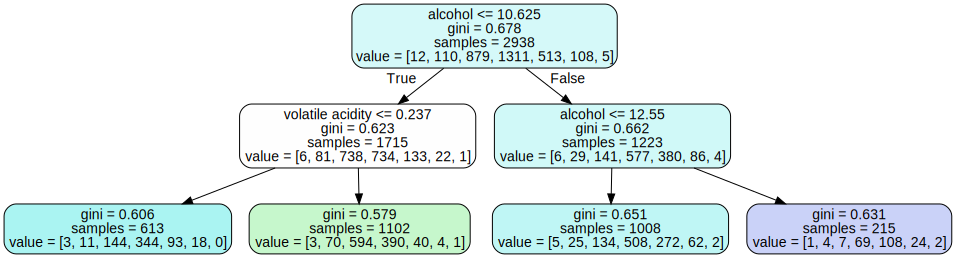

In [42]:
dot_data_white = tree.export_graphviz(clfTree, out_file=None, max_depth=None, feature_names=features, filled=True, rounded=True)
valgTree_white = graphviz.Source(dot_data_white)
valgTree_white

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

We observe that our model uses the level of alcohol first to make a decision. Also, note that if the alcohol level is high and the sulphate levels are high, then the wine quality is most likely 'good'. On the other hand, is the alcohol level is low and volatile acidity is high, then the wine quality is most likely 'bad'.

In [43]:
valgTree_white.render("dt_white")

'dt_white.pdf'

In [44]:
y_pred = clfTree.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        53
           5       0.53      0.65      0.58       578
           6       0.51      0.64      0.57       887
           7       0.48      0.18      0.26       367
           8       0.00      0.00      0.00        67

   micro avg       0.51      0.51      0.51      1960
   macro avg       0.25      0.25      0.24      1960
weighted avg       0.48      0.51      0.48      1960



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
accu_score_dt_white = accuracy_score(y_test, y_pred)
accu_score_dt_white

0.514795918367347

In [47]:
print(accuracy_score(y_test, y_pred))

0.514795918367347


In [48]:
accuracy = pd.DataFrame({'model': ["Random Forest Classifier - Red", "Random Forest Classifier - White", "Decision Tree - Red", "Decision Tree - White"], 'accuracy': [accu_score_rfc_red, accu_score_rfc_white, accu_score_dt_red, accu_score_dt_white]})
accuracy

,model,accuracy
0,Random Forest Classifier - Red,0.605469
1,Random Forest Classifier - White,0.626531
2,Decision Tree - Red,0.526563
3,Decision Tree - White,0.514796
